# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

          x         y  class
0  2.882026  2.191366    1.0
1  2.200079  1.982879    1.0
2  2.489369  2.548173    1.0
3  3.120447  1.882892    1.0
4  2.933779  1.826275    1.0


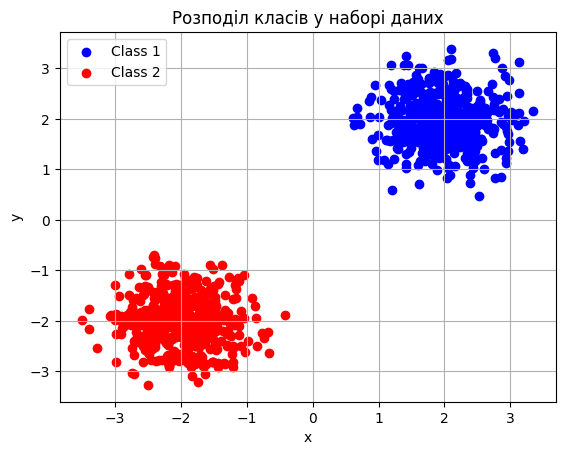

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv('synthetic_dataset.csv')

# Огляд даних
print(data.head())

# Візуалізація даних
plt.scatter(data[data['class'] == 1]['x'], data[data['class'] == 1]['y'], label='Class 1', color='blue')
plt.scatter(data[data['class'] == 0]['x'], data[data['class'] == 0]['y'], label='Class 2', color='red')
plt.title("Розподіл класів у наборі даних")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

# Виділення ознак і міток
X = data[['x', 'y']]
y = data['class']

# Розподіл даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Навчальна вибірка: {X_train.shape}, Тестова вибірка: {X_test.shape}')

Навчальна вибірка: (700, 2), Тестова вибірка: (300, 2)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Ініціалізація моделей
logreg = LogisticRegression()
svc = SVC(kernel='linear')
knn = KNeighborsClassifier(n_neighbors=5)

# Навчання моделей
logreg.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Прогнози моделей
logreg_pred = logreg.predict(X_test)
svc_pred = svc.predict(X_test)
knn_pred = knn.predict(X_test)

# Оцінка продуктивності
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

evaluate_model(y_test, logreg_pred, 'Logistic Regression')
evaluate_model(y_test, svc_pred, 'SVM')
evaluate_model(y_test, knn_pred, 'KNN')

Logistic Regression - Accuracy: 1.00, Precision: 1.00, Recall: 1.00
SVM - Accuracy: 1.00, Precision: 1.00, Recall: 1.00
KNN - Accuracy: 1.00, Precision: 1.00, Recall: 1.00


C:\Users\roman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


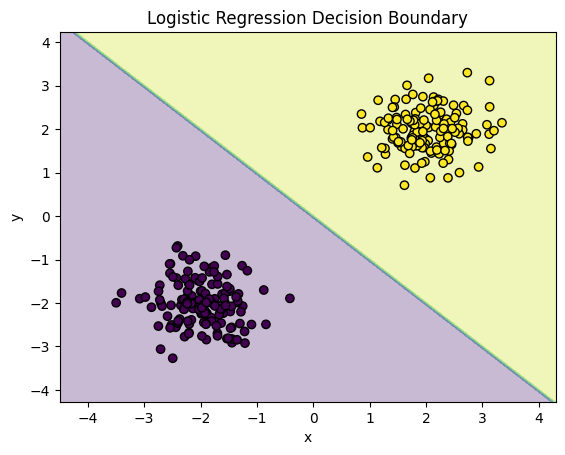

C:\Users\roman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


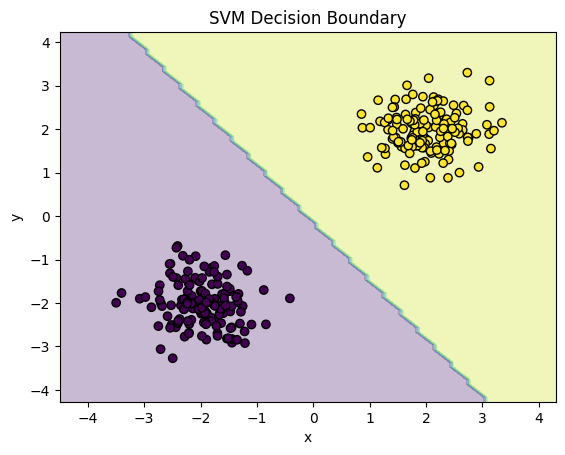

C:\Users\roman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


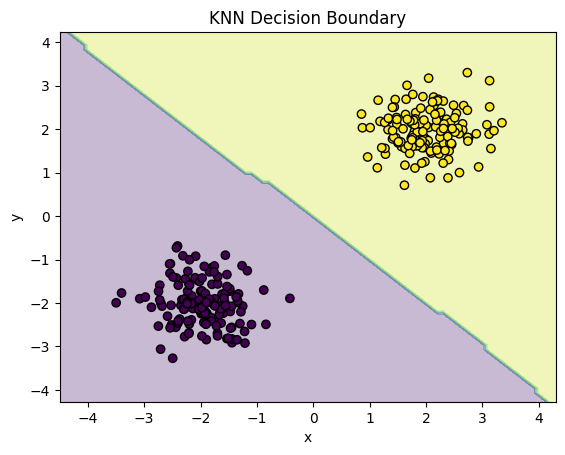

In [6]:
import numpy as np

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
    y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X['x'], X['y'], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

plot_decision_boundary(logreg, X_test, y_test, 'Logistic Regression Decision Boundary')
plot_decision_boundary(svc, X_test, y_test, 'SVM Decision Boundary')
plot_decision_boundary(knn, X_test, y_test, 'KNN Decision Boundary')

### Висновки:
1. Логістична регресія - підходить для лінійно розділених даних і працює ефективно на цьому наборі.
2. SVM з лінійним ядром також показує гарні результати, бо дані лінійно розділені.
3. K-ближчих сусідів (KNN) може бути менш точним, особливо при більшому шумі або невеликих навчальних вибірках.

На основі отриманих метрик та візуалізації, найбільш підходящими моделями є Логістична регресія та SVM для лінійно розділених даних.

**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.

          x         y  class
0  0.496714 -0.828995    0.0
1 -0.138264 -0.560181    0.0
2  0.647689  0.747294    0.0
3  1.523030  0.610370    0.0
4 -0.234153 -0.020902    0.0


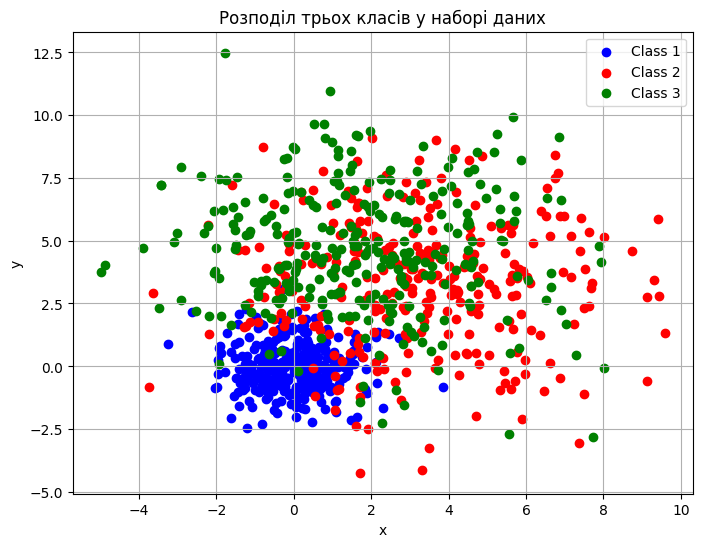

In [7]:
# Завантаження даних
data = pd.read_csv('synthetic_dataset_900_points.csv')

# Огляд даних
print(data.head())

# Візуалізація даних для трьох класів
plt.figure(figsize=(8, 6))
plt.scatter(data[data['class'] == 0]['x'], data[data['class'] == 0]['y'], label='Class 1', color='blue')
plt.scatter(data[data['class'] == 1]['x'], data[data['class'] == 1]['y'], label='Class 2', color='red')
plt.scatter(data[data['class'] == 2]['x'], data[data['class'] == 2]['y'], label='Class 3', color='green')
plt.title("Розподіл трьох класів у наборі даних")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Виділення ознак і міток
X = data[['x', 'y']]
y = data['class']

# Розподіл даних на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Навчальна вибірка: {X_train.shape}, Тестова вибірка: {X_test.shape}')

Навчальна вибірка: (630, 2), Тестова вибірка: (270, 2)


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Ініціалізація моделей
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
svc = SVC(kernel='rbf', probability=True)  # Використовуємо ядро RBF для кращого оброблення перекриття
rf = RandomForestClassifier(n_estimators=100)

# Навчання моделей
logreg.fit(X_train, y_train)
svc.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# Прогнози моделей
logreg_pred = logreg.predict(X_test)
svc_pred = svc.predict(X_test)
rf_pred = rf.predict(X_test)

# Функція для оцінки продуктивності моделей
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

# Оцінка кожної моделі
evaluate_model(y_test, logreg_pred, 'Logistic Regression')
evaluate_model(y_test, svc_pred, 'SVM')
evaluate_model(y_test, rf_pred, 'Random Forest')

Logistic Regression - Accuracy: 0.69, Precision: 0.68, Recall: 0.69
SVM - Accuracy: 0.68, Precision: 0.68, Recall: 0.68
Random Forest - Accuracy: 0.65, Precision: 0.65, Recall: 0.65


C:\Users\roman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


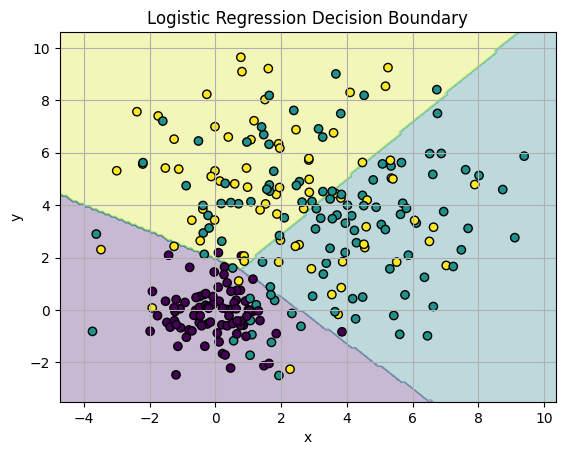

C:\Users\roman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


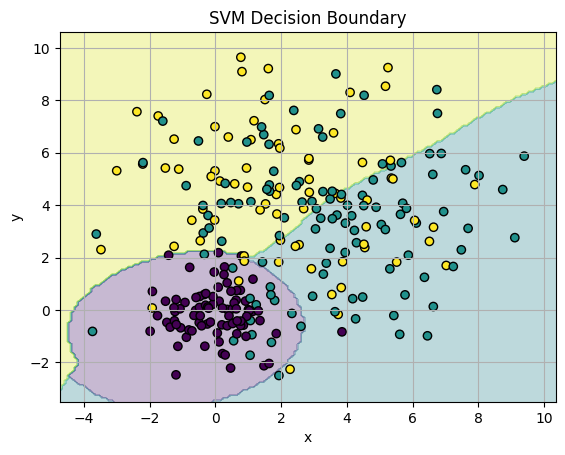

C:\Users\roman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


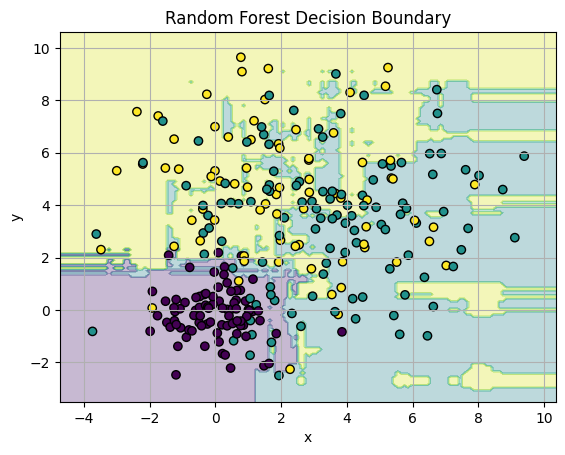

In [11]:
# Функція для побудови межі класифікації
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
    y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X['x'], X['y'], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# Візуалізація меж класифікації для кожної моделі
plot_decision_boundary(logreg, X_test, y_test, 'Logistic Regression Decision Boundary')
plot_decision_boundary(svc, X_test, y_test, 'SVM Decision Boundary')
plot_decision_boundary(rf, X_test, y_test, 'Random Forest Decision Boundary')

**Аналіз отриманих результатів**:

1. Логістична регресія може дати нижчу точність, оскільки вона лінійна і не так добре працює в умовах перекриття.
2. SVM з RBF ядром краще справляється з нелінійними розмежуваннями, тому може мати вищі показники.
3. Random Forest є гнучкою моделлю і має переваги у випадках з перекриттям класів, тому може показати кращі результати.

Висновок: Перекриття класів робить задачу складнішою для моделей, особливо для лінійних методів. Моделі, здатні обробляти нелінійні межі, як SVM і Random Forest, працюють краще.



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

          x         y  class
0  2.524836  0.027727    0.0
1  2.492889  0.119101    0.0
2  2.531595  0.040252    0.0
3  2.574375  0.160255    0.0
4  2.485135  0.026261    0.0


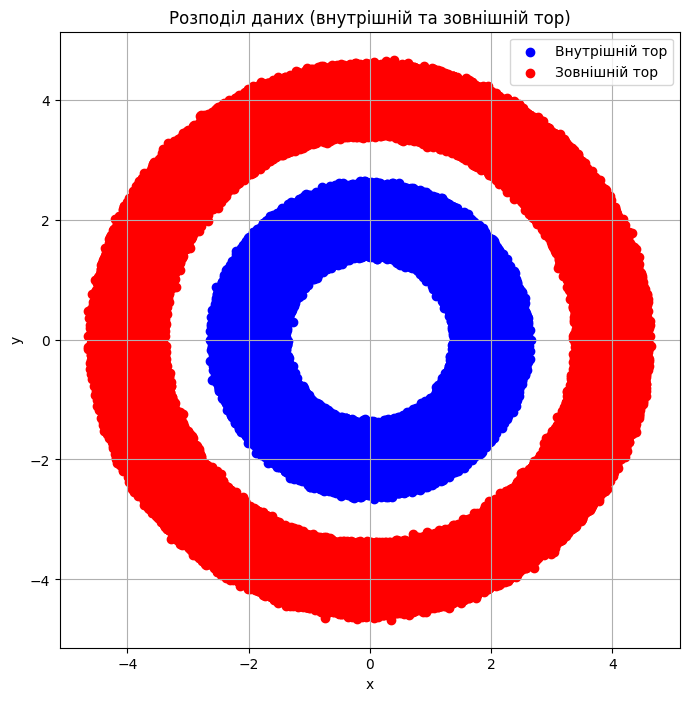

In [12]:
# Завантаження даних
data = pd.read_csv('toroidal_dataset_1000_points.csv')

# Огляд перших п'яти рядків даних
print(data.head())

# Візуалізація даних двох класів
plt.figure(figsize=(8, 8))
plt.scatter(data[data['class'] == 0]['x'], data[data['class'] == 0]['y'], label='Внутрішній тор', color='blue')
plt.scatter(data[data['class'] == 1]['x'], data[data['class'] == 1]['y'], label='Зовнішній тор', color='red')
plt.title("Розподіл даних (внутрішній та зовнішній тор)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Виділення ознак та міток класу
X = data[['x', 'y']]
y = data['class']

# Розподіл на навчальні і тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Навчальна вибірка: {X_train.shape}, Тестова вибірка: {X_test.shape}')

Навчальна вибірка: (350000, 2), Тестова вибірка: (150000, 2)


In [14]:
# Ініціалізація моделей
logreg = LogisticRegression()
svc = SVC(kernel='rbf')  # Ядро RBF краще працює для нелінійних даних
rf = RandomForestClassifier(n_estimators=100)

# Навчання моделей
logreg.fit(X_train, y_train)
svc.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
# Прогнози моделей
logreg_pred = logreg.predict(X_test)
svc_pred = svc.predict(X_test)
rf_pred = rf.predict(X_test)

# Функція для оцінки продуктивності
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

# Оцінка кожної моделі
evaluate_model(y_test, logreg_pred, 'Logistic Regression')
evaluate_model(y_test, svc_pred, 'SVM')
evaluate_model(y_test, rf_pred, 'Random Forest')

Logistic Regression - Accuracy: 0.36, Precision: 0.42, Recall: 0.70
SVM - Accuracy: 1.00, Precision: 1.00, Recall: 1.00
Random Forest - Accuracy: 1.00, Precision: 1.00, Recall: 1.00


C:\Users\roman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


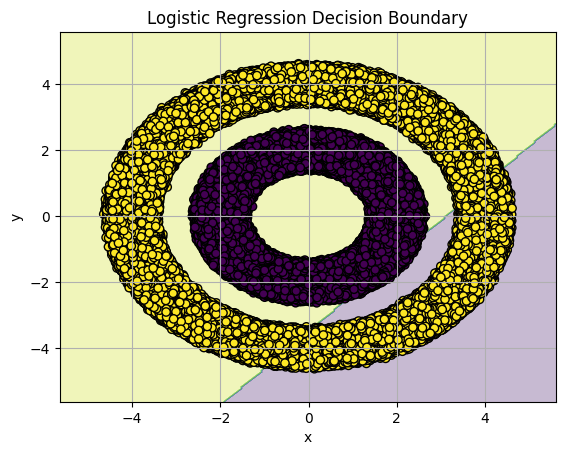

C:\Users\roman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


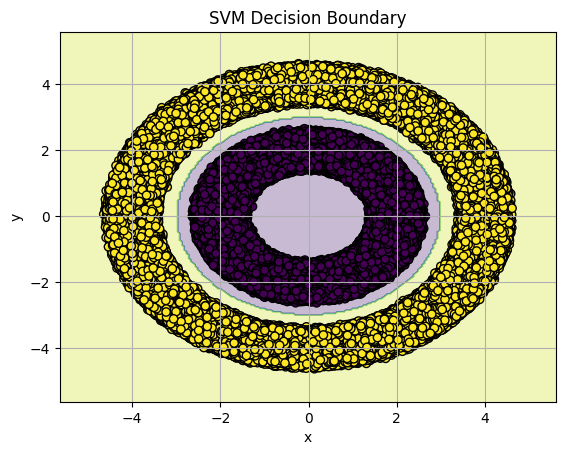

C:\Users\roman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


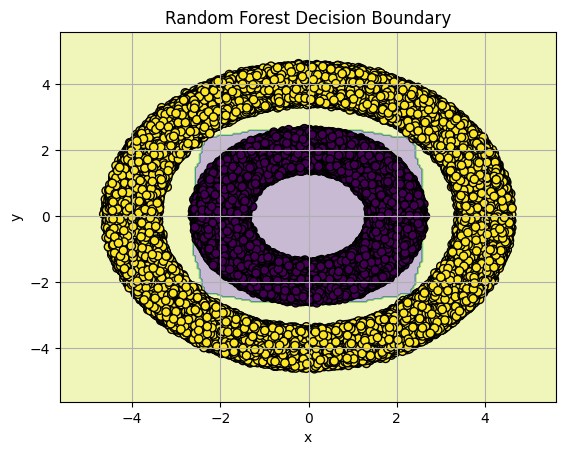

In [16]:
# Функція для візуалізації межі класифікації
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
    y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X['x'], X['y'], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# Візуалізація меж класифікації для кожної моделі
plot_decision_boundary(logreg, X_test, y_test, 'Logistic Regression Decision Boundary')
plot_decision_boundary(svc, X_test, y_test, 'SVM Decision Boundary')
plot_decision_boundary(rf, X_test, y_test, 'Random Forest Decision Boundary')

**Аналіз отриманих результатів**:

1. Логістична регресія погано працює для даних з нелінійними межами класифікації (торами).
2. SVM з RBF ядром краще справляється з нелінійними та складними топологіями, оскільки використовує нелінійне ядро.
3. Random Forest добре адаптується до складних даних, завдяки своїй здатності обробляти нелінійності через гнучкі дерева рішень.

Висновок: У складних задачах з нелінійними межами (як у випадку з тором всередині іншого тора) моделі з нелінійною обробкою (SVM, Random Forest) показують кращі результати у порівнянні з лінійними моделями (Логістична регресія).

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

          x         y  class
0  1.061335  0.106873    0.0
1  1.208253  0.028226    0.0
2  1.072151  0.095447    0.0
3  1.176940  0.146989    0.0
4  0.904636  0.290071    0.0


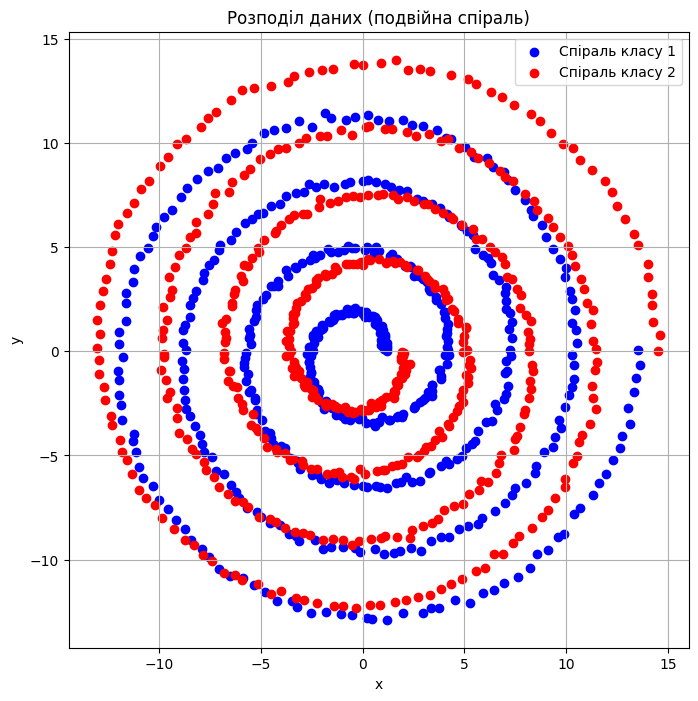

In [17]:
# Завантаження даних
data = pd.read_csv('spiral_dataset_1000_points.csv')

# Огляд перших п'яти рядків даних
print(data.head())

# Візуалізація даних двох класів
plt.figure(figsize=(8, 8))
plt.scatter(data[data['class'] == 0]['x'], data[data['class'] == 0]['y'], label='Спіраль класу 1', color='blue')
plt.scatter(data[data['class'] == 1]['x'], data[data['class'] == 1]['y'], label='Спіраль класу 2', color='red')
plt.title("Розподіл даних (подвійна спіраль)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# Виділення ознак та міток класу
X = data[['x', 'y']]
y = data['class']

# Розподіл на навчальні і тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Навчальна вибірка: {X_train.shape}, Тестова вибірка: {X_test.shape}')

Навчальна вибірка: (700, 2), Тестова вибірка: (300, 2)


In [19]:
# Ініціалізація моделей
logreg = LogisticRegression()
svc = SVC(kernel='rbf')  # Ядро RBF краще підходить для нелінійних даних
rf = RandomForestClassifier(n_estimators=100)

# Навчання моделей
logreg.fit(X_train, y_train)
svc.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Прогнози моделей
logreg_pred = logreg.predict(X_test)
svc_pred = svc.predict(X_test)
rf_pred = rf.predict(X_test)

# Функція для оцінки продуктивності
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

# Оцінка кожної моделі
evaluate_model(y_test, logreg_pred, 'Logistic Regression')
evaluate_model(y_test, svc_pred, 'SVM')
evaluate_model(y_test, rf_pred, 'Random Forest')

Logistic Regression - Accuracy: 0.52, Precision: 0.52, Recall: 0.46
SVM - Accuracy: 0.52, Precision: 0.52, Recall: 0.57
Random Forest - Accuracy: 0.71, Precision: 0.73, Recall: 0.69


C:\Users\roman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


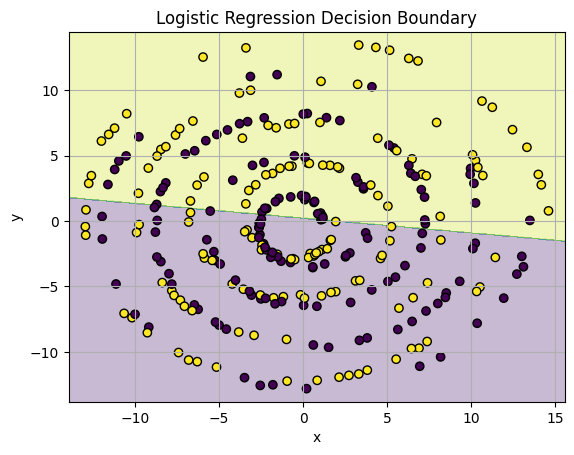

C:\Users\roman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


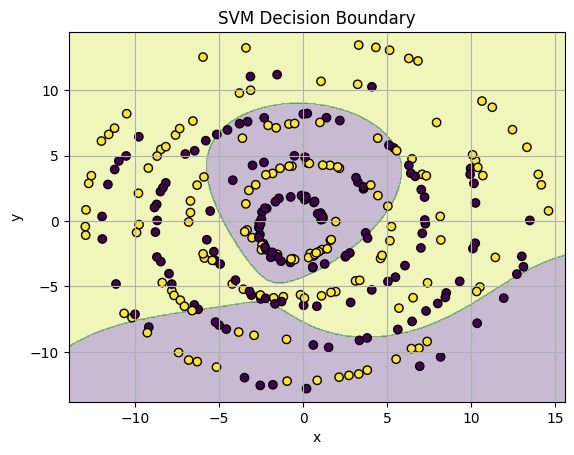

C:\Users\roman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


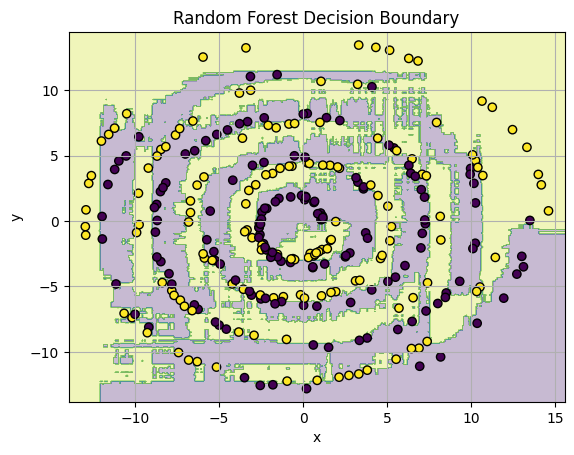

In [21]:
import numpy as np

# Функція для візуалізації межі класифікації
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
    y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X['x'], X['y'], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# Візуалізація меж класифікації для кожної моделі
plot_decision_boundary(logreg, X_test, y_test, 'Logistic Regression Decision Boundary')
plot_decision_boundary(svc, X_test, y_test, 'SVM Decision Boundary')
plot_decision_boundary(rf, X_test, y_test, 'Random Forest Decision Boundary')

**Аналіз отриманих результатів**:

1. Логістична регресія погано справляється з подвійною спіраллю через лінійну природу моделі.
2. SVM з RBF ядром добре працює з нелінійними даними, оскільки використовує нелінійні межі для класифікації.
3. Random Forest також добре адаптується до нелінійних даних завдяки гнучкості дерев рішень.

Висновок: Моделі з нелінійними підходами (SVM та Random Forest) працюють краще для класифікації даних з подвійною спіраллю. Логістична регресія не є підходящою для цієї задачі через лінійні межі класифікації.
